In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('DATA/press_test.txt', header=0, sep='\t', skipinitialspace=True)

In [3]:
data.head()

,Runnr,Alpha-pr,Cd-press,Cl-press,Cm-press,Cn-press,Ct-press,Re-press,M-press,Q-press,...,Cpl_017,Cpl_018,Cpl_019,Cpl_020,Cpl_021,Cpl_022,Cpl_023,Cn-p-cor,Ct-p-cor,Cm-p-cor
0,/,degrees,/,/,/,/,/,/,/,Pa,...,55.10000,60.10000,69.90000,75.00000,80.00000,90.00000,100.00000,/,/,/
1,1,-2.003,0.001752,-0.2165,0.0035,-0.2164,-0.005817,7.046E+5,0.127,1126.43,...,-0.45317,-0.33675,-0.18723,-0.12405,-0.08466,0.00047,0.17033,-0.2164,-0.005814,0.0035
2,2,-1.004,0.001411,-0.1191,0.0039,-0.1191,-0.000676,7.037E+5,0.127,1125.69,...,-0.40842,-0.35962,-0.17088,-0.11066,-0.07496,0.00348,0.17304,-0.1191,-0.000674,0.0039
3,3,-0.000,0.001280,-0.0171,0.0027,-0.0171,0.001280,7.034E+5,0.127,1125.01,...,-0.36723,-0.33329,-0.15124,-0.09681,-0.06443,0.00672,0.17568,-0.0171,0.001282,0.0027
4,4,1.004,0.001838,0.0851,0.0014,0.0852,0.000347,7.032E+5,0.127,1124.94,...,-0.33017,-0.29442,-0.12963,-0.08000,-0.05258,0.00952,0.17785,0.0852,0.000348,0.0014


In [4]:
dataT = data.T
dataT.columns = data['Alpha-pr'].values
dataT.drop(index=['Alpha-pr', 'Runnr'], inplace=True)
dataT.head()

,degrees,-2.003,-1.004,-0.000,1.004,2.008,3.012,4.016,3.514,4.513,...,16.007,16.511,17.011,16.516,16.018,15.516,15.016,14.520,14.024,13.542
Cd-press,/,0.001752,0.001411,0.001280,0.001838,0.002953,0.005009,0.007468,0.006232,0.008771,...,0.224375,0.216425,0.222318,0.215566,0.232558,0.225085,0.223523,0.208144,0.193900,0.065654
Cl-press,/,-0.2165,-0.1191,-0.0171,0.0851,0.1826,0.2770,0.3753,0.3261,0.4226,...,0.5727,0.5062,0.5040,0.5023,0.6107,0.6256,0.6798,0.7337,0.7783,0.9270
Cm-press,/,0.0035,0.0039,0.0027,0.0014,0.0019,0.0033,0.0039,0.0035,0.0043,...,-0.0673,-0.0562,-0.0559,-0.0550,-0.0747,-0.0727,-0.0732,-0.0586,-0.0478,0.0289
Cn-press,/,-0.2164,-0.1191,-0.0171,0.0852,0.1826,0.2768,0.3749,0.3258,0.4219,...,0.6123,0.5468,0.5470,0.5429,0.6511,0.6630,0.7145,0.7625,0.8021,0.9166
Ct-press,/,-0.005817,-0.000676,0.001280,0.000347,-0.003445,-0.009548,-0.018835,-0.013763,-0.024501,...,0.057754,0.063637,0.065136,0.063866,0.055031,0.049524,0.039774,0.017538,-0.000479,-0.153241


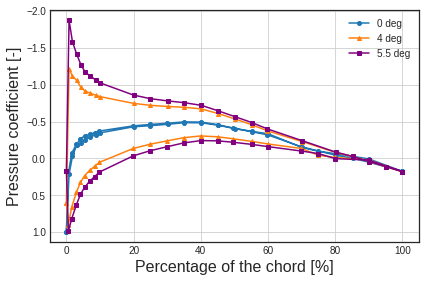

In [5]:
#Some CP plots overview

x = dataT.loc['Cpu_001':'Cpl_023','degrees'].values
y = dataT.loc['Cpu_001':'Cpl_023','-0.000':'10.543'].values

plt.style.use('seaborn-whitegrid')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

plt.plot(x, y[:, 0], linestyle='solid', label="0 deg", marker='o', markersize=4)
plt.plot(x, y[:, 4], linestyle='solid', label="4 deg", marker='^', markersize=4)
plt.plot(x, y[:, 8], linestyle='solid', label="5.5 deg", marker='s', markersize=4, color="purple")
plt.gca().invert_yaxis()
plt.ylabel("Pressure coefficient [-]", fontsize=16)
plt.xlabel("Percentage of the chord [%]", fontsize=16)
plt.tight_layout(pad=1, h_pad=0.5, w_pad=0.5)
plt.legend()
plt.savefig("CPexample_measurements.pdf")

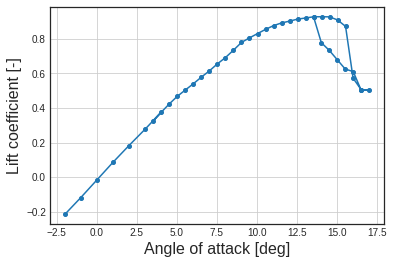

In [6]:
#CL plot overview

x = data.loc['1':'41', 'Alpha-pr',].values.astype(np.float)
y = data.loc['1':'41', 'Cl-press',].values.astype(np.float)

plt.style.use('seaborn-whitegrid')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

plt.plot(x, y, linestyle='solid', marker='o', markersize=4)
plt.ylabel("Lift coefficient [-]", fontsize=16)
plt.xlabel("Angle of attack [deg]", fontsize=16)
# plt.tight_layout(pad=1, h_pad=0.5, w_pad=0.5)
# plt.legend()
plt.savefig("CL2D_measurements.pdf")

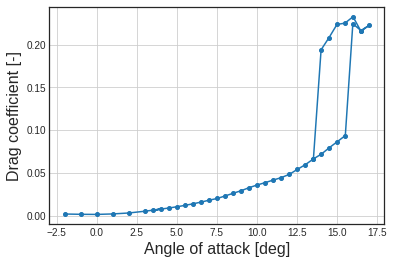

In [7]:
#CD plot overview

x = data.loc['1':'41', 'Alpha-pr',].values.astype(np.float)
y = data.loc['1':'41', 'Cd-press',].values.astype(np.float)

plt.style.use('seaborn-whitegrid')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

plt.plot(x, y, linestyle='solid', marker='o', markersize=4)
plt.ylabel("Drag coefficient [-]", fontsize=16)
plt.xlabel("Angle of attack [deg]", fontsize=16)
# plt.tight_layout(pad=1, h_pad=0.5, w_pad=0.5)
# plt.legend()
plt.savefig("CD2D_measurements.pdf")

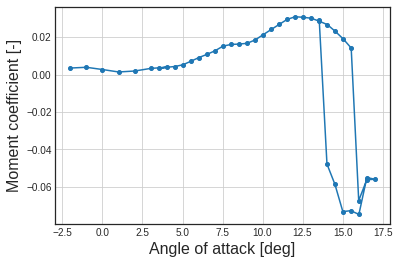

In [8]:
#Cm plot overview

x = data.loc['1':'41', 'Alpha-pr',].values.astype(np.float)
y = data.loc['1':'41', 'Cm-press',].values.astype(np.float)

plt.style.use('seaborn-whitegrid')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

plt.plot(x, y, linestyle='solid', marker='o', markersize=4)
plt.ylabel("Moment coefficient [-]", fontsize=16)
plt.xlabel("Angle of attack [deg]", fontsize=16)
# plt.tight_layout(pad=1, h_pad=0.5, w_pad=0.5)
# plt.legend()
plt.savefig("CM2D_measurements.pdf")

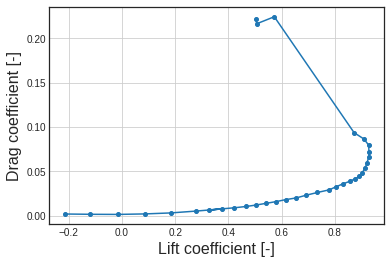

In [10]:
#CdCl plot overview

x = data.loc['1':'34', 'Cl-press',].values.astype(np.float)
y = data.loc['1':'34', 'Cd-press',].values.astype(np.float)

plt.style.use('seaborn-whitegrid')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

plt.plot(x, y, linestyle='solid', marker='o', markersize=4)
plt.ylabel("Drag coefficient [-]", fontsize=16)
plt.xlabel("Lift coefficient [-]", fontsize=16)
# plt.tight_layout(pad=1, h_pad=0.5, w_pad=0.5)
# plt.legend()
plt.savefig("CDCL2D_measurements.pdf")